In [1]:
import sys
import time
import datetime as dt
from datetime import datetime
import urllib
# Number manipulation
import numpy as np


# Structure manipulation
import pandas as pd
from pandas import Series, DataFrame
from pandas.tools.plotting import scatter_matrix


# Graphing 
import seaborn as sb

import matplotlib.pyplot as plt
from matplotlib import rcParams


# Stats
import scipy as sp
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency


# Machine Learning & Preprocessing Package
import sklearn
import sklearn.metrics as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import LassoLarsIC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_validation import train_test_split

import statsmodels.api as sm

from collections import Counter

import networkx as nx



# Parameters for graphs
%matplotlib inline
rcParams['figure.figsize'] = 10,10
sb.set_style('whitegrid')


# Mac
#x = pd.read_csv('/Users/magicsoccer10/Dropbox/twerk werk/Data/07-17.csv')

# Arch
#x = pd.read_csv('C:/Users/scott/Dropbox/twerk werk/Data/cre_values')

# Work
x = pd.read_csv('C:/Users/sstandring/Dropbox/twerk werk/Data/cre_values')

df = x.dropna(axis = 0)

C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df.isnull().sum()

Property Address      0
Property City         0
Property Zip Code     0
Sale Date             0
Sale_Price            0
PropertyType          0
Cap_Rate              0
Bldg SF               0
Floor Area Ratio      0
Building Class        0
Building Condition    0
BuildingMaterials     0
Year Built            0
Number Of Units       0
Number Of Tenants     0
Longitude             0
Latitude              0
dtype: int64

In [3]:
df['sqft'] = df['Bldg SF']
df['cap'] = df['Cap_Rate'].astype(int)
df['units'] = df['Number Of Units']
df['sale_date'] = pd.to_datetime(df['Sale Date'])
df['sale_quarter'] = df['sale_date'].dt.quarter
df['sale_quarter'] = df['sale_quarter'].astype('str')
df['log_price'] = np.log(df.Sale_Price)
df['log_sqft'] = np.log(df['Bldg SF'])
df['log_far'] = np.log(df['Floor Area Ratio'])
df['log_units'] = np.log(df.units)

num = LabelEncoder()
df['bin_city'] = num.fit_transform(df['Property City'].astype('str'))
df['bin_yrbuilt'] = num.fit_transform(df['Year Built'].astype('str'))


C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [4]:
def remover(s):
    return int(s[-4:])

df['year'] = [remover(s) for s in df['Sale Date']]

df['sale_year'] = df['year'].astype('str')
df['sale_y_q'] = df.sale_year + '.' + df.sale_quarter
df['sale_year_qrt'] = df['sale_y_q'].astype('float')
df['sale_year_qrt'] = df['sale_year_qrt'] - 2000

df['yearbuilt'] = df['Year Built'].astype('str').str[:-3]
df['yearbuilt'] = df['yearbuilt'].astype(int)

df['Property Zip Code'] = df['Property Zip Code'].astype('str').str[:-2]
df['bin_zip'] = num.fit_transform(df['Property Zip Code'].astype('str'))
df['zipper'] = df['Property Zip Code'].astype('str')

C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [5]:
mf = df.loc[df['PropertyType'] == 'Multi-Family']
mf = mf.loc[mf['sale_year'] != '2007']
mf = mf.loc[mf['sale_year'] != '2008']
mf = mf.loc[mf['sale_year'] != '2009']
mf = mf.loc[mf['sale_year'] != '2010']
mf = mf.loc[mf['sale_year'] != '2011']

In [6]:
abc=mf.loc[mf['zipper'] == '941']

# Continuous Variables

C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


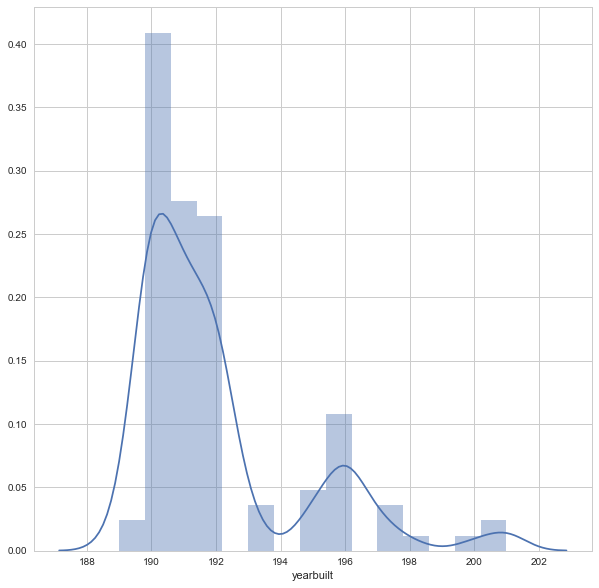

In [7]:
a = abc.yearbuilt
sb.distplot(a)

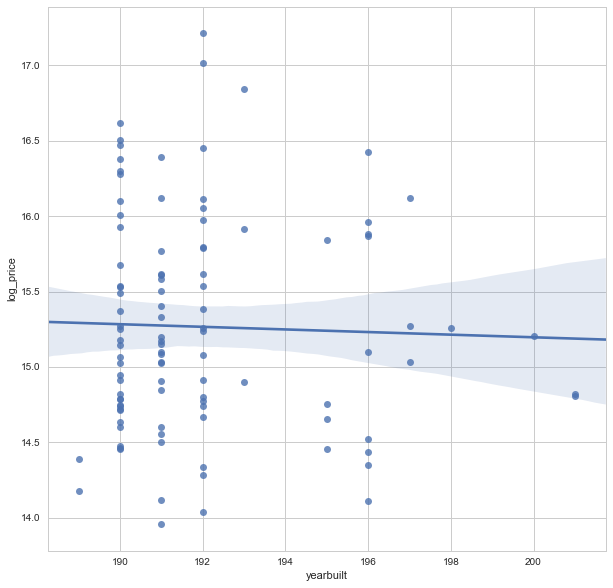

In [8]:
sb.regplot('yearbuilt','log_price',abc, scatter=True)

C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


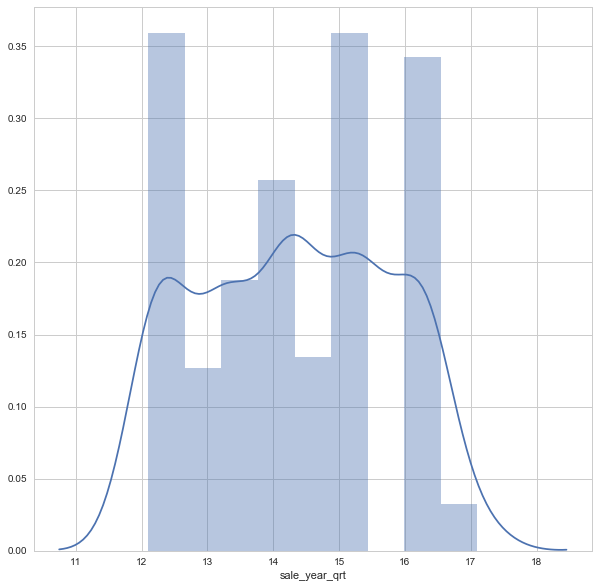

In [9]:
a = mf.sale_year_qrt
sb.distplot(a)

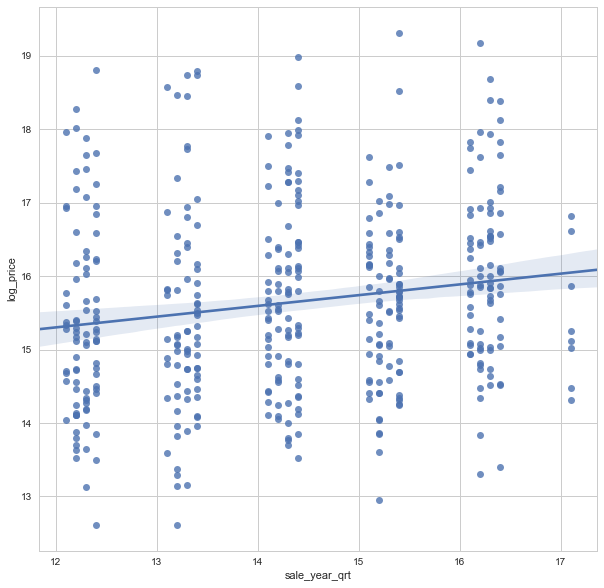

In [10]:
sb.regplot('sale_year_qrt','log_price',mf, scatter=True)

C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


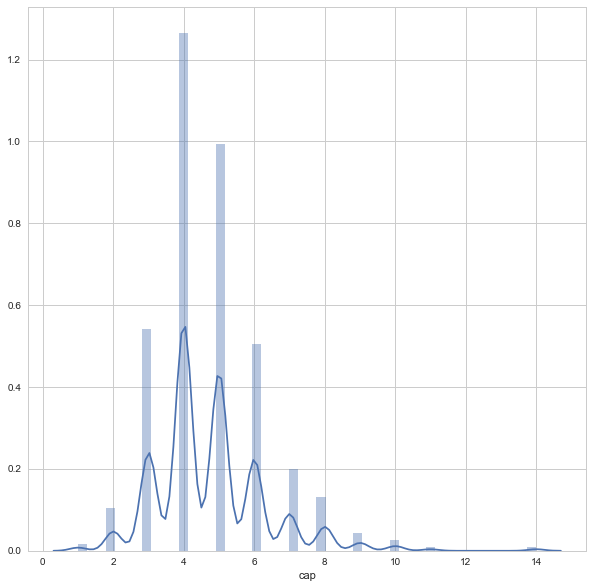

In [11]:
b = mf.cap
sb.distplot(b)

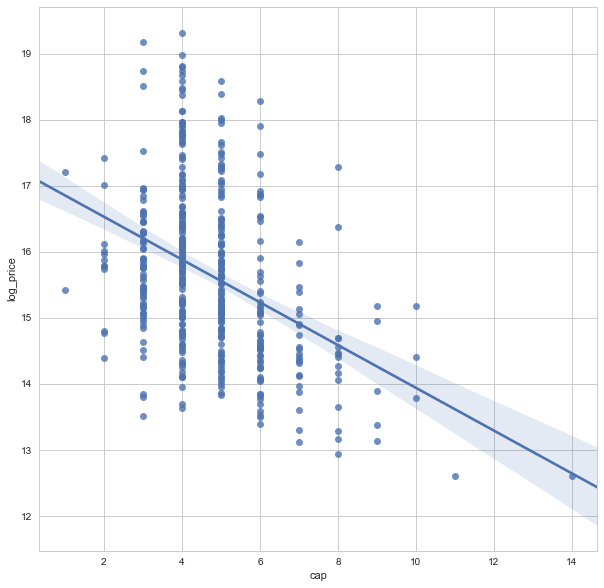

In [12]:
sb.regplot('cap','log_price',mf,scatter=True)

C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


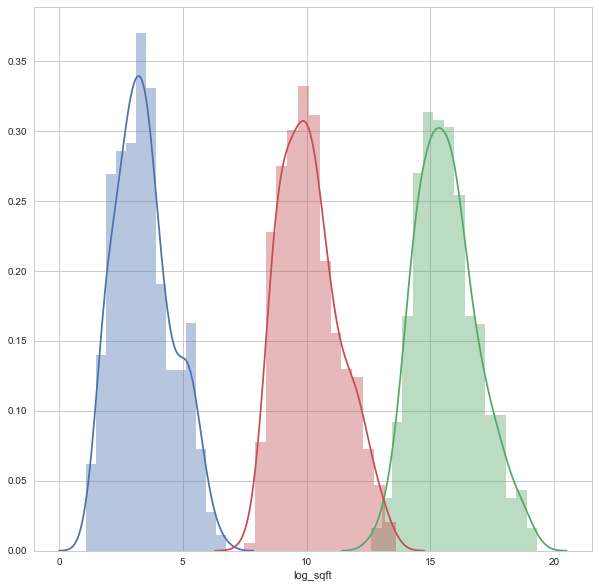

In [13]:
x = mf.log_units
sb.distplot(x)
y = mf.log_price
sb.distplot(y)
z = mf.log_sqft
sb.distplot(z)

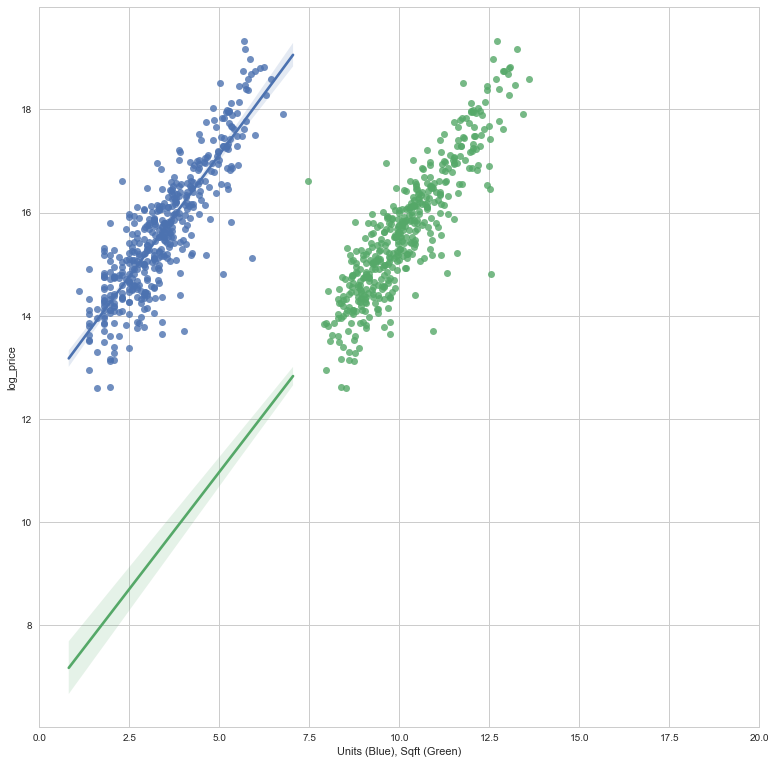

In [14]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1,1])

sb.regplot('log_units','log_price',mf, scatter=True)
sb.regplot('log_sqft','log_price',mf, scatter=True)
ax.set_xlim(0,20)
plt.xlabel('Units (Blue), Sqft (Green)')

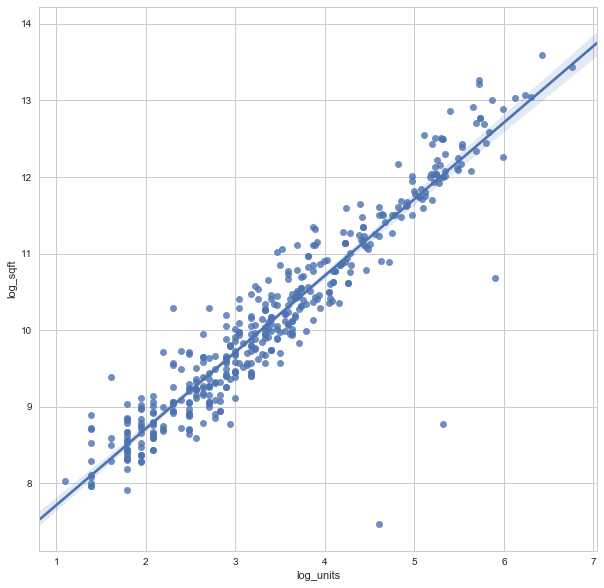

In [15]:
sb.regplot('log_units','log_sqft',mf, scatter=True)

### Units and Sqft are collinear...
We should make a variable from the 2 variables that will take the place of both. 

In [16]:
mf['unit_sqft'] = mf.log_units/mf.log_sqft
mf.unit_sqft.head()

1937    0.396077
1938    0.430020
1946    0.413935
1951    0.396935
1952    0.453655
Name: unit_sqft, dtype: float64

C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


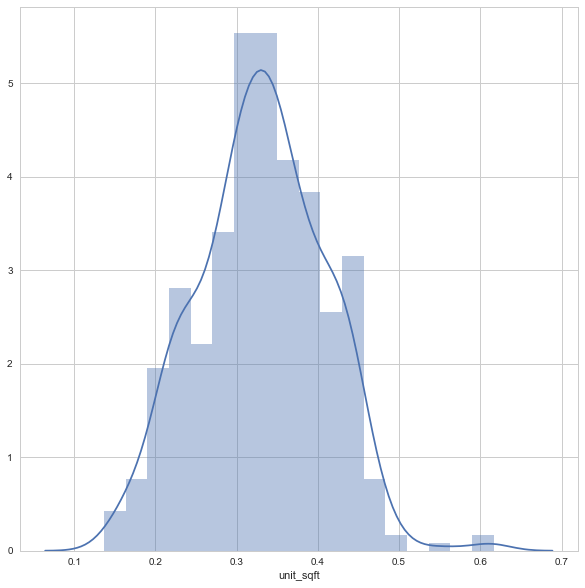

In [17]:
x = mf.unit_sqft
sb.distplot(x)

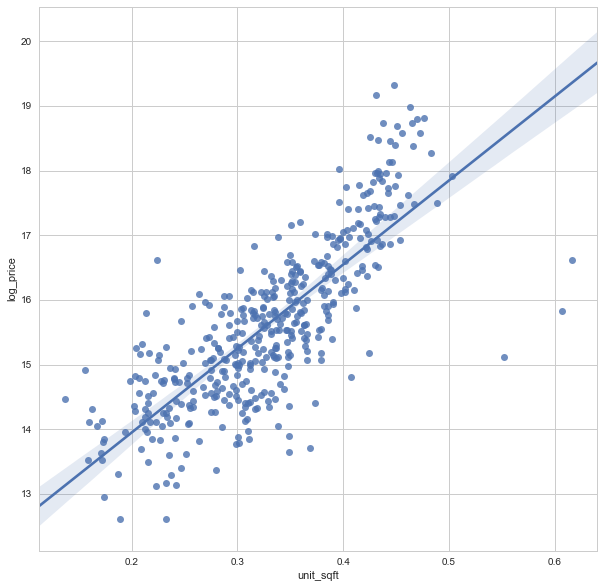

In [18]:
sb.regplot('unit_sqft','log_price',mf, scatter=True)

# Categorical Variables

C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


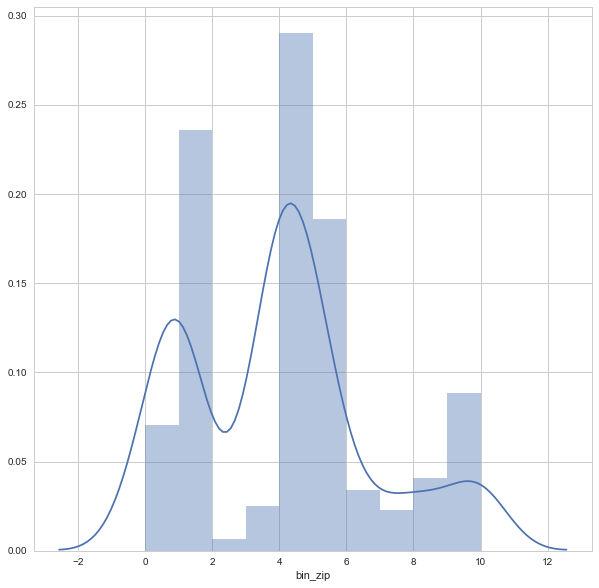

In [19]:
c = mf.bin_zip
sb.distplot(c)

C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


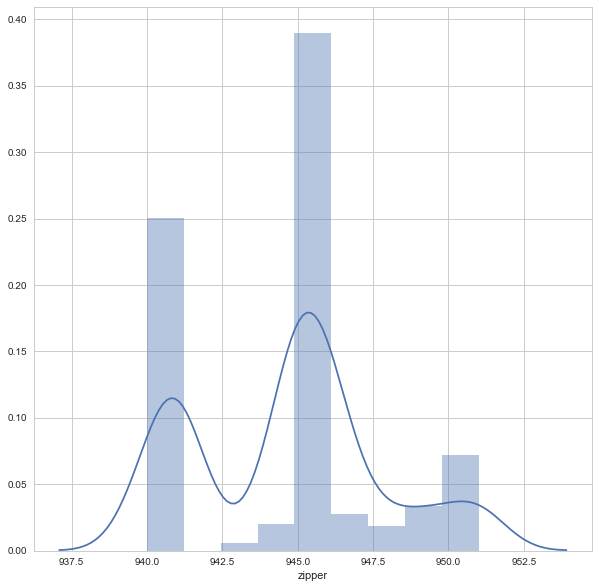

In [20]:
c = mf.zipper.astype('int')
sb.distplot(c)

In [27]:
freqs = Counter(df.zipper)
print(freqs)

Counter({'945': 185, '941': 174, '946': 133, '940': 57, '951': 55, '947': 27, '949': 23, '948': 15, '950': 14, '944': 13, '943': 3})


In [21]:
mf.columns.values
mf.head()

,Property Address,Property City,Property Zip Code,Sale Date,Sale_Price,PropertyType,Cap_Rate,Bldg SF,Floor Area Ratio,Building Class,...,bin_city,bin_yrbuilt,year,sale_year,sale_y_q,sale_year_qrt,yearbuilt,bin_zip,zipper,unit_sqft
1937,790 DeLong Ave,Novato,949,4/19/2012,67000000,Multi-Family,5.00,192927,5.052561,A,...,35,105,2012,2012,2012.2,12.2,200,8,949,0.396077
1938,355 N Wolfe Rd,Sunnyvale,940,2/16/2012,63150000,Multi-Family,4.75,204060,0.679910,B,...,56,90,2012,2012,2012.1,12.1,199,0,940,0.430020
1946,448 Toyon Ave,San Jose,951,5/1/2012,29000000,Multi-Family,6.00,163780,0.576491,C,...,47,85,2012,2012,2012.2,12.2,198,10,951,0.413935
1951,1070 Reed Ave,Sunnyvale,940,1/31/2012,23000000,Multi-Family,3.75,109296,0.605917,C,...,56,70,2012,2012,2012.1,12.1,197,0,940,0.396935
1952,215 W MacArthur Blvd,Oakland,946,3/30/2012,22425000,Multi-Family,6.24,193118,2.736662,B,...,36,74,2012,2012,2012.1,12.1,197,5,946,0.453655


In [22]:
mff = mf[['log_price','cap','unit_sqft','sale_year_qrt','bin_zip','bin_yrbuilt','Property Zip Code']]

In [23]:
mf_data = mff.ix[:,(1,2,3,4,5)].values
mf_target = mff.ix[:,0].values
mf_data_names = ['Cap Rate','Unit/Sqft','Sale Year and Quarter', 'Zip', 'Year Built']
X,y = scale(mf_data), mf_target
LinReg = LinearRegression(normalize=True)
LinReg.fit(X,y)
print(LinReg.score(X,y))
print(LinReg.coef_)

0.742962045267
[-0.40361847  0.91720598  0.01982101 -0.05207236  0.13258916]


C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


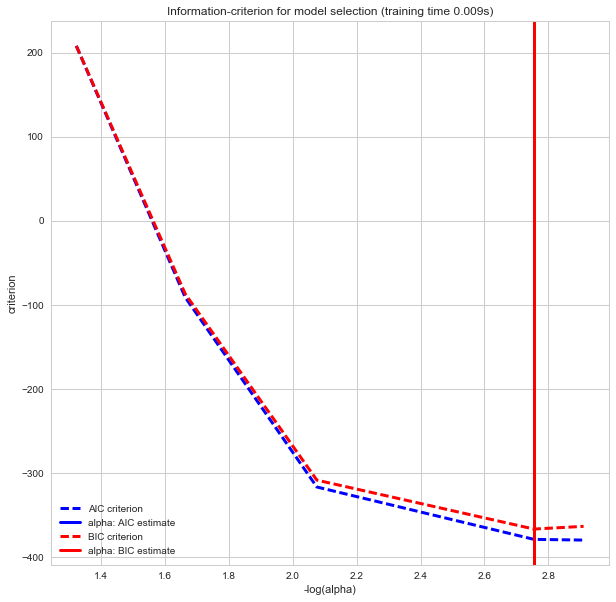

In [24]:
model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)

In [25]:
print(model_bic.score(X,y))
print(model_aic.coef_)

0.739433413283
[-0.40361847  0.91720598  0.01982101 -0.05207236  0.13258916]


In [26]:
step = linear_model.LassoLars(alpha = 0.0)
step.fit(X,y)
print(step.score(X,y))
print(step.coef_)
print(LinReg.score(X,y))
print(LinReg.coef_)
print(model_bic.score(X,y))
print(model_aic.coef_)

0.742962045267
[-0.40361847  0.91720598  0.01982101 -0.05207236  0.13258916]
0.742962045267
[-0.40361847  0.91720598  0.01982101 -0.05207236  0.13258916]
0.739433413283
[-0.40361847  0.91720598  0.01982101 -0.05207236  0.13258916]
